In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Global Mean Sea Level
GMSL_x = np.loadtxt(r'GMSL_TPJAOS_5.1_199209_202208.txt', skiprows=49, usecols=2)
GMSL   = np.loadtxt(r'GMSL_TPJAOS_5.1_199209_202208.txt', skiprows=49, usecols=5)
GMSL_std = np.loadtxt(r'GMSL_TPJAOS_5.1_199209_202208.txt', skiprows=49, usecols=6)

In [2]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "JUL", "Aug", "Sep", "Oct", "Nov", "Dec"]

f = open("GMSL_x.txt", 'w')
old = 0
for i in range(len(GMSL_x)):
    year = int(GMSL_x[i])
    month = GMSL_x[i]-year
    month = int(month*12)
    f.write(f"\"{months[month]},{str(year)}\",\n")
f.close()

In [3]:
f = open("GMSL.txt", 'w')
for i in range(len(GMSL)):
    f.write(f"{str(GMSL[i])},\n")
f.close()

In [4]:
f = open("GMSL_std.txt", 'w')
for i in range(len(GMSL_std)):
    f.write(f"{str(GMSL_std[i])},\n")
f.close()

In [5]:
# regression
def simple_linear_regression(raw_x, raw_y):
    n = np.size(raw_x)
    x = np.array(raw_x)
    y = np.array(raw_y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    num1 = np.sum(y*x) - n*y_mean*x_mean
    num2 = np.sum(x*x) - n*x_mean*x_mean
     
    r = num1 / num2
    b = y_mean - r * x_mean
    
    return (r, b)

r, b = simple_linear_regression(GMSL_x, GMSL)
print(r,b)
GMSL_reg = []
for i in GMSL_x:
    GMSL_reg.append(r*i+b)

3.1591806900187214 -6336.45241945898


In [6]:
f = open("GMSL_reg.txt", 'w')
for i in range(len(GMSL_reg)):
    f.write(f"{str(GMSL_reg[i])},\n")
f.close()

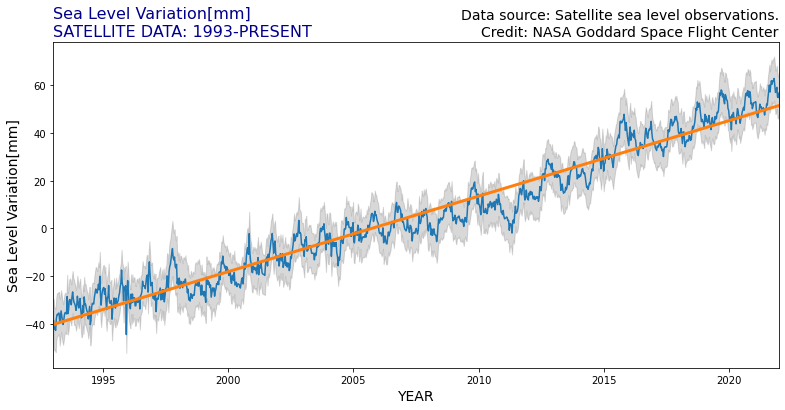

In [7]:
fig,ax = plt.subplots(1,1,figsize=(13,6))
plt.plot(GMSL_x, GMSL)
plt.plot(GMSL_x, GMSL_reg, linewidth=3)
plt.fill_between(GMSL_x,GMSL-GMSL_std*0.1, GMSL+GMSL_std*0.1, alpha=0.3, color='gray')
plt.xlim(1993, 2022)

plt.xlabel('YEAR', fontsize=14)
plt.ylabel('Sea Level Variation[mm]', fontsize=14)
plt.title('Sea Level Variation[mm]\nSATELLITE DATA: 1993-PRESENT', fontsize=16, loc='left', color='darkBlue')
plt.title('Data source: Satellite sea level observations.\nCredit: NASA Goddard Space Flight Center', fontsize=14, loc='right', color='Black')
plt.show()

range(1999, 2013)
[0.8746875000000001, 0.7318571428571429, 0.942470588235294, 1.0752439024390243, 1.0126136363636362, 1.04, 0.973939393939394, 0.7925, 1.1518791946308726, 1.3045541401273886, 1.3466935483870968, 1.2368496420047732, 1.1166751918158568, 1.3170802919708031]


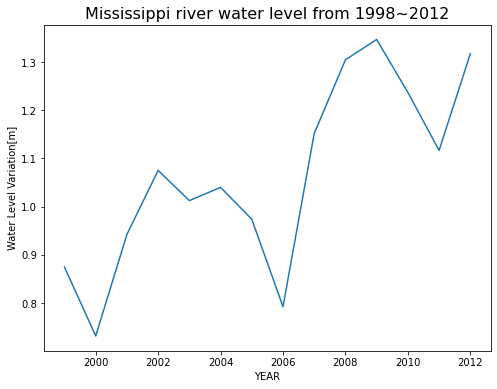

In [8]:
station = np.loadtxt(r'Missicipi river water level.txt', dtype='str',skiprows=1, usecols=0)
WL = np.loadtxt(r'Missicipi river water level.txt', skiprows=1, usecols=11) # Water level
year = np.loadtxt(r'Missicipi river water level.txt', skiprows=1, usecols=2) # Water level
WL_1999 = []
WL_2000 = []
WL_2001 = []
WL_2002 = []
WL_2003 = []
WL_2004 = []
WL_2005 = []
WL_2006 = []
WL_2007 = []
WL_2008 = []
WL_2009 = []
WL_2010 = []
WL_2011 = []
WL_2012 = []
WL_all  = [] # 放一年平均一次

for i in range(len(year)):
    if year[i] == 1999:
          WL_1999.append(WL[i])
    elif year[i] == 2000:
          WL_2000.append(WL[i])
    elif year[i] == 2001:
          WL_2001.append(WL[i])
    elif year[i] == 2002:
          WL_2002.append(WL[i])
    elif year[i] == 2003:
          WL_2003.append(WL[i])
    elif year[i] == 2004:
          WL_2004.append(WL[i])
    elif year[i] == 2005:
          WL_2005.append(WL[i])
    elif year[i] == 2006:
          WL_2006.append(WL[i]) 
    elif year[i] == 2007:
          WL_2007.append(WL[i])
    elif year[i] == 2008:
          WL_2008.append(WL[i])
    if year[i] == 2009:
          WL_2009.append(WL[i])
    elif year[i] == 2010:
          WL_2010.append(WL[i])
    elif year[i] == 2011:
          WL_2011.append(WL[i])   
    elif year[i] == 2012:
          WL_2012.append(WL[i])

WL_all.append(np.mean(WL_1999))
WL_all.append(np.mean(WL_2000))
WL_all.append(np.mean(WL_2001))
WL_all.append(np.mean(WL_2002))
WL_all.append(np.mean(WL_2003))
WL_all.append(np.mean(WL_2004))
WL_all.append(np.mean(WL_2005))
WL_all.append(np.mean(WL_2006))
WL_all.append(np.mean(WL_2007))
WL_all.append(np.mean(WL_2008))
WL_all.append(np.mean(WL_2009))
WL_all.append(np.mean(WL_2010))
WL_all.append(np.mean(WL_2011))
WL_all.append(np.mean(WL_2012))

WL_std = np.std(WL_all)


x = range(1999,2013)
print(x)
print(WL_all)
plt.figure(figsize=(8,6))
plt.plot(x,WL_all)

plt.title('Mississippi river water level from 1998~2012', fontsize=16)
plt.xlabel('YEAR')
plt.ylabel('Water Level Variation[m]')
plt.show()


In [9]:
begin = 1999
# mean & noemalize
mean = np.mean(WL_all)
print(mean)
for i in range(len(WL_all)):
    WL_all[i] -= mean
    WL_all[i] = WL_all[i]*30.4
f = open("Missi.txt", 'w')
for i in range(len(GMSL_x)):
    if GMSL_x[i] > begin:
        f.write(f"{WL_all[begin-1999]},\n")
        begin += 1
        if begin == 2013:
            begin = 100000
    else:
        f.write(f"NaN,\n")
f.close()

1.0655031551979488
